Jacob Knopping
1/3/2020

## 16.7 Assignment

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

    1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
    2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
    3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

#### 1. Are the exam score variables distributed normally? If not, apply Box-Cox transformation. Does anything change?

In [3]:
education_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Text(0.5, 1.0, 'histogram of writing score')

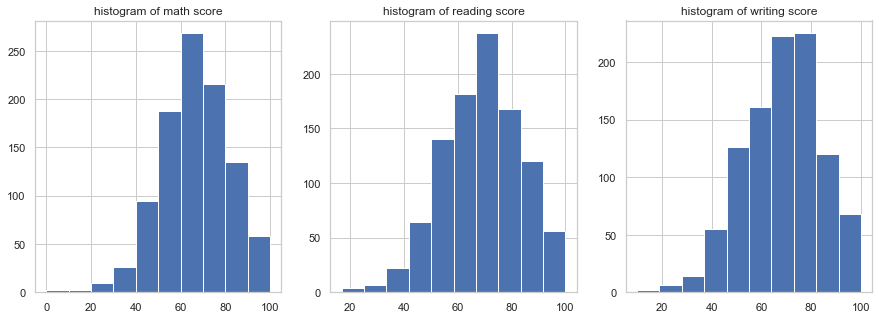

In [6]:
plt.figure(figsize=(15,5))

# histograms of the original data
plt.subplot(1, 3, 1)
plt.hist(education_df["math score"])
plt.title("histogram of math score")

plt.subplot(1, 3, 2)
plt.hist(education_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(1, 3, 3)
plt.hist(education_df["writing score"])
plt.title("histogram of writing score")

In [10]:
#Normal test
from scipy.stats import normaltest

print(normaltest(education_df['math score']))
print(normaltest(education_df['reading score']))
print(normaltest(education_df['writing score']))

#Jarque-Bera test
from scipy.stats import jarque_bera

print(jarque_bera(education_df['math score']))
print(jarque_bera(education_df['reading score']))
print(jarque_bera(education_df['writing score']))

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)
NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)
NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)
(15.912256686712709, 0.0003505075386818213)
(11.383300575987892, 0.0033740202672214448)
(13.98509448257235, 0.0009187033894586527)


Jarque-Bera tests and normal tests confirm that the original distributions are not normal.

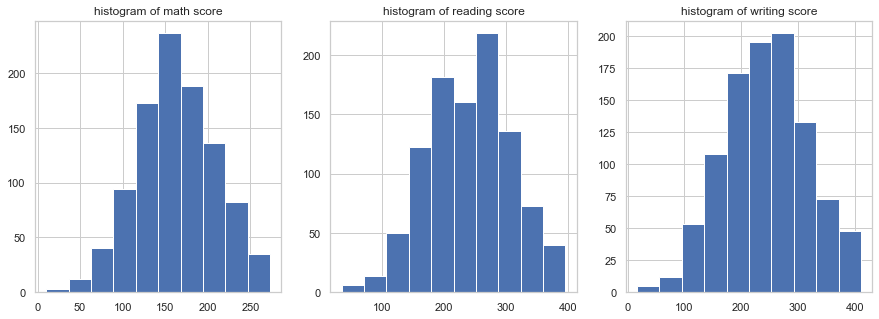

In [15]:
from scipy.stats import boxcox

bc_math,_ = boxcox(education_df[education_df["math score"] > 0]["math score"])
bc_reading,_ = boxcox(education_df['reading score'])
bc_writing,_ = boxcox(education_df['writing score'])

plt.figure(figsize=(15,5))

# histograms of the boxcox data
plt.subplot(1, 3, 1)
plt.hist(bc_math)
plt.title("histogram of math score")

plt.subplot(1, 3, 2)
plt.hist(bc_reading)
plt.title("histogram of reading score")

plt.subplot(1, 3, 3)
plt.hist(bc_writing)
plt.title("histogram of writing score")

plt.show()

In [18]:
from scipy.stats import normaltest

print(normaltest(bc_math))
print(normaltest(bc_reading))
print(normaltest(bc_writing))

#Jarque-Bera test
from scipy.stats import jarque_bera

print(jarque_bera(bc_math))
print(jarque_bera(bc_reading))
print(jarque_bera(bc_writing))

NormaltestResult(statistic=1.8323073377495822, pvalue=0.40005482895717037)
NormaltestResult(statistic=5.282274611852865, pvalue=0.07128015609575467)
NormaltestResult(statistic=6.267311355043339, pvalue=0.04355827085023795)
(1.720098104874378, 0.4231413256953709)
(4.119778575331906, 0.1274680814024559)
(4.746478090040098, 0.09317842784055597)


After the Box-Cox transformation, the distributions became much closer to normal, as confirmed by both the normal and Jarque-Bera test statistics.

#### 2. Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed.

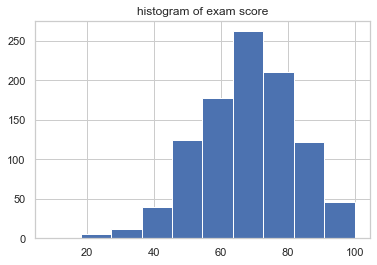

(15.453387913085168, 0.00044089934264401887)
NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)


In [19]:
exam_score = (education_df["math score"] +
              education_df["reading score"] + education_df["writing score"])/3

plt.hist(exam_score)
plt.title("histogram of exam score")
plt.show()

jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print(jb_stats)
print(norm_stats)

The weighted avergae of exam scores is not normally distributed.

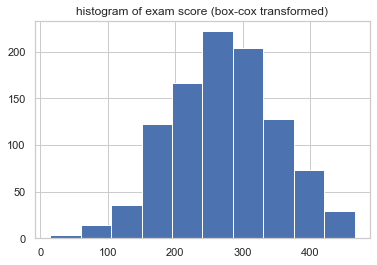

(2.4353987431906026, 0.29591016374203183)
NormaltestResult(statistic=2.779857245981238, pvalue=0.2490930835165177)


In [20]:
exams_boxcox,_ = boxcox(exam_score)

plt.hist(exams_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print(jb_stats)
print(norm_stats)

The distribution for the new variable becomes normal with the Box-Cox transformation.

#### 3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

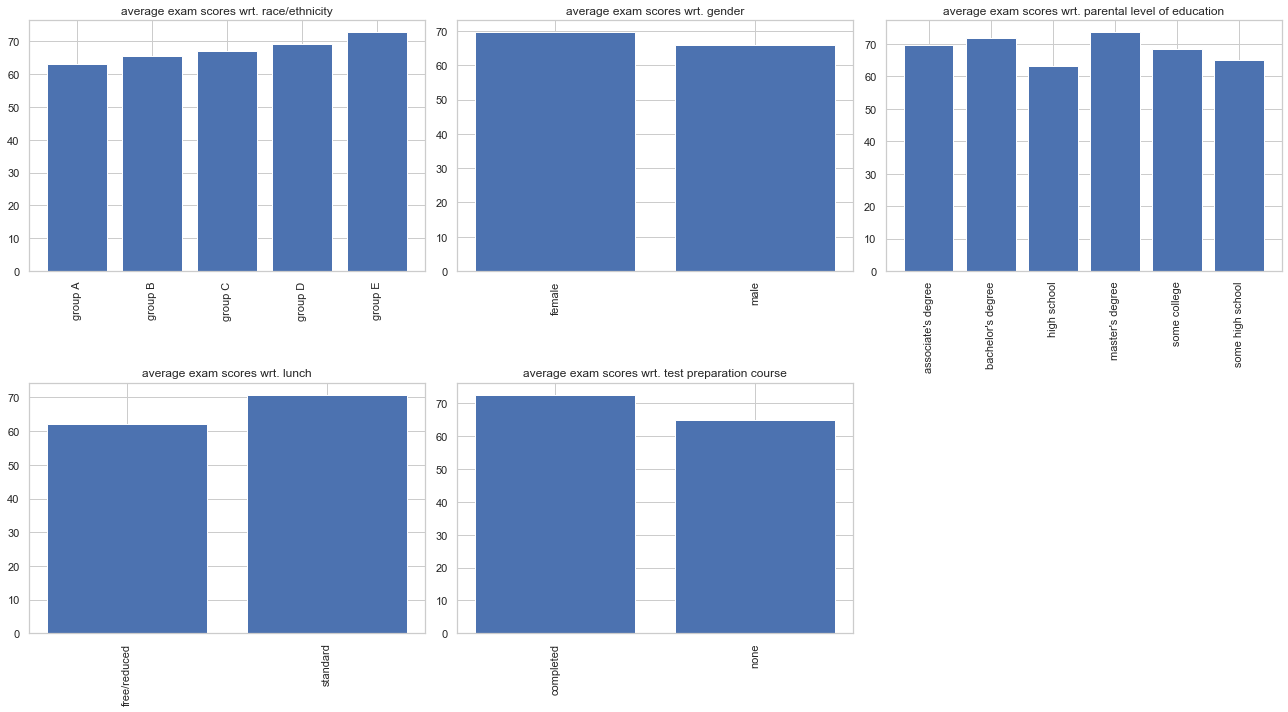

In [21]:
#From thinkful:
education_df["exam_score"] = exam_score

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(education_df.groupby("race/ethnicity")
        ["exam_score"].mean().index, education_df.groupby("race/ethnicity")["exam_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(education_df.groupby("gender")
        ["exam_score"].mean().index, education_df.groupby("gender")["exam_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(education_df.groupby("parental level of education")
        ["exam_score"].mean().index, education_df.groupby("parental level of education")["exam_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(education_df.groupby("lunch")
        ["exam_score"].mean().index, education_df.groupby("lunch")["exam_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(education_df.groupby("test preparation course")
        ["exam_score"].mean().index, education_df.groupby("test preparation course")["exam_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

From thinkful: 

    Average exam score increases from group A to group E. Hence race/ethnicity may play an important role in explaining the successes in the exams.

    Female students seem to be more successful than the males.

    There is also some variation between the parental levels of education with respect to the exam scores.

    Lunch type also exhibits variance in the average exam scores. But, this is probably not because of the lunch type itself but because of something that affects both the lunch type and the exam scores.

    Those who completed the test preparation course seem to be more successful than the others.

    Considering all these, all variables might be used in explaining the success in the exams but the lunch variable should be used precautiously.